# Principal Component Analysis

## import library

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [64]:
fname_data  = 'assignment_12_data.txt'
feature0    = np.genfromtxt(fname_data, delimiter=',')

number_data     = np.size(feature0, 0)
number_feature  = np.size(feature0, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 50
number of feature : 2


## plot the input data

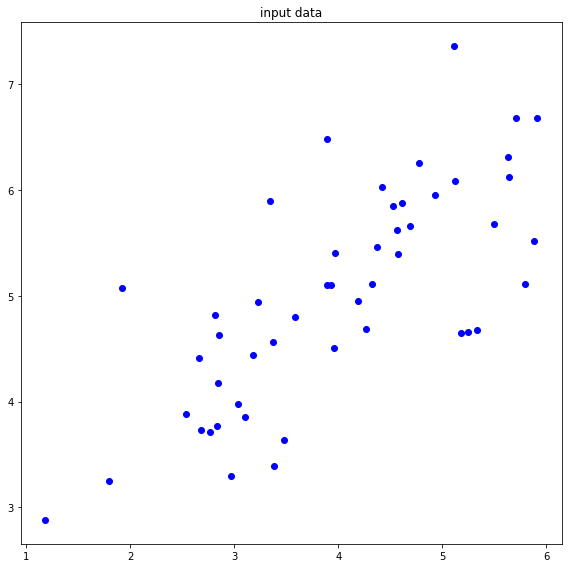

In [65]:
plt.figure(figsize=(8,8))   
plt.title('input data')

x0 = feature0[:,0]
y0 = feature0[:,1]

plt.scatter(x0, y0, color='blue')

plt.tight_layout()
plt.show()

## Normalization (Z-scoring)
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [66]:
def normalize(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    feature_normalize = np.zeros(feature.shape)
    
    feature_normalize[:,0] = (feature[:, 0] - np.mean(feature[:,0])) / np.std(feature[:, 0])
    feature_normalize[:,1] = (feature[:, 1] - np.mean(feature[:,1])) / np.std(feature[:, 1])
                                                                              
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return feature_normalize

In [67]:
feature = normalize(feature0)

x   = feature[:, 0]
y   = feature[:, 1]

min_x = np.min(x)
min_y = np.min(y)

max_x = np.max(x)
max_y = np.max(y)

## compute covariance matrix
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [68]:
def compute_covariance(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    ## normalize된 feature에 대하여, covariance matrix 구하기

    feature_normalize = normalize(feature)
    
    Sigma = (1/feature.shape[0]) * (feature_normalize.T @ feature_normalize)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return Sigma

## compute principal components
- `np.linalg.eig`
- `argsort()`
- return the eigenvalues and the eigenvectors in a decreasing order according to the eigenvalues

In [69]:
def compute_principal_component(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    ## 1) covariance matrix를 구하고
    ## 2) covariance matrix의 eigenvalue, eigenvector 구하기
    ## 3) 가장 큰 eigenvalue를 갖는 eigenvector와, 그에 해당하는 eigenvalue와의 곱을 통해 principal_component_1, 두번째는 principal_component_2

    Sigma = compute_covariance(feature)
    
    eigenvalue, eigenvector = np.linalg.eig(Sigma)
    
    sorted_index = np.argsort(eigenvalue)[::-1]
    
    principal_component_1 = np.multiply(eigenvalue[sorted_index][0], eigenvector[:, sorted_index[:1]])
    principal_component_2 = np.multiply(eigenvalue[sorted_index][1], eigenvector[:, sorted_index[1:]])

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
     
    return (principal_component_1, principal_component_2)

## compute the projection of point onto the axis
- `np.matmul`
- `np.dot`
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features
- shape of vector = $m \times 1$ where $m$ is the dimension of features

In [70]:
def compute_projection_onto_line(feature, vector):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    v = vector
    v_norm = np.sqrt( sum(v**2) )
    projection = (np.dot(feature, v.reshape(-1,1))/v_norm**2) * v.reshape(1,-1)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return projection

## compute the principal components and the projection of feature

In [71]:
(principal_component_1, principal_component_2) = compute_principal_component(feature)

projection1 = compute_projection_onto_line(feature, principal_component_1)
projection2 = compute_projection_onto_line(feature, principal_component_2)

---

---

## functions for presenting the results

---

---

In [72]:
def function_result_01():
   
    plt.figure(figsize=(8,8))
    plt.title('data normalized by z-scoring')
    plt.scatter(x, y, color='blue')

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [73]:
def function_result_02():

    plt.figure(figsize=(8,8))
    plt.title('principal components')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.scatter(x,y, color='blue')
    
    plt.annotate("", xytext=(0,0), xy=compute_principal_component(feature0)[0], arrowprops={"facecolor": "red"})
    plt.annotate("", xytext=(0,0), xy=compute_principal_component(feature0)[1], arrowprops={"facecolor": "green"})
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [74]:
def function_result_03():

    plt.figure(figsize=(8,8))
    plt.title('first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.scatter(x,y, color='blue')

    x1, y1 = 0, 0
    x2 = compute_principal_component(feature0)[0][0]
    y2 = compute_principal_component(feature0)[0][1]
    
    m = (y2-y1) / (x2-x1)
    n = y1 - (m*x1)
    
    X = np.arange(min_x-0.5, max_x+0.5, 0.1)
    Y = [(m*num + n) for num in X]
    
    plt.plot(X,Y, color='red')
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [75]:
def function_result_04():

    plt.figure(figsize=(8,8))
    plt.title('second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.scatter(x,y, color='blue')

    x1, y1 = 0, 0
    x2 = compute_principal_component(feature0)[1][0]
    y2 = compute_principal_component(feature0)[1][1]
    
    m = (y2-y1) / (x2-x1)
    n = y1 - (m*x1)
    
    X = np.arange(min_x-0.5, max_x+0.5, 0.1)
    Y = [(m*num + n) for num in X]
    
    plt.plot(X,Y, color='red')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [76]:
def function_result_05():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.scatter(x,y, color='blue')
    
    x1, y1 = 0, 0
    x2 = compute_principal_component(feature0)[0][0]
    y2 = compute_principal_component(feature0)[0][1]
    
    m = (y2-y1) / (x2-x1)
    n = y1 - (m*x1)
    
    X = np.arange(min_x-0.5, max_x+0.5, 0.1)
    Y = [(m*num + n) for num in X]
    
    plt.plot(X,Y, color='red')

    #plt.scatter(compute_projection_onto_line(normalize(feature0), pca1), compute_projection_onto_line(normalize(featuer0), pca1), color='green')
    plt.scatter(projection1[:, 0], projection1[:, 1])
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()


In [77]:
def function_result_06():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    plt.scatter(x,y, color='blue')
    
    x1, y1 = 0, 0
    x2 = compute_principal_component(feature0)[1][0]
    y2 = compute_principal_component(feature0)[1][1]
    
    m = (y2-y1) / (x2-x1)
    n = y1 - (m*x1)
    
    X = np.arange(min_x-0.5, max_x+0.5, 0.1)
    Y = [(m*num + n) for num in X]
    
    plt.plot(X,Y, color='red')

    #plt.scatter(compute_projection_onto_line(normalize(feature0), pca1), compute_projection_onto_line(normalize(featuer0), pca1), color='green')
    plt.scatter(projection2[:, 0], projection2[:, 1])

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [78]:
def function_result_07():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    plt.scatter(x,y, color='blue')
    
    x1, y1 = 0, 0
    x2 = compute_principal_component(feature0)[0][0]
    y2 = compute_principal_component(feature0)[0][1]
    
    m = (y2-y1) / (x2-x1)
    n = y1 - (m*x1)
    
    X = np.arange(min_x-0.5, max_x+0.5, 0.1)
    Y = [(m*num + n) for num in X]
    
    plt.plot(X,Y, color='red')

    #plt.scatter(compute_projection_onto_line(normalize(feature0), pca1), compute_projection_onto_line(normalize(featuer0), pca1), color='green')
    plt.scatter(projection1[:, 0], projection1[:, 1])

    plt.plot([x, projection1[:,0]], [y, projection1[:,1]], color='gray', zorder=0, linewidth=1)
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [79]:
def function_result_08():

    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.scatter(x,y, color='blue')
    
    x1, y1 = 0, 0
    x2 = compute_principal_component(feature0)[1][0]
    y2 = compute_principal_component(feature0)[1][1]
    
    m = (y2-y1) / (x2-x1)
    n = y1 - (m*x1)
    
    X = np.arange(min_x-0.5, max_x+0.5, 0.1)
    Y = [(m*num + n) for num in X]
    
    plt.plot(X,Y, color='red')

    plt.scatter(projection2[:, 0], projection2[:, 1])

    plt.plot([x, projection2[:,0]], [y, projection2[:,1]], color='gray', zorder=0, linewidth=1)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************


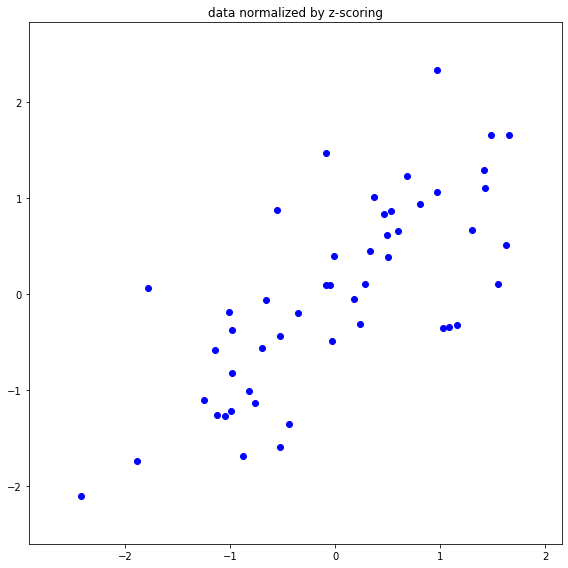

**************************************************
## [RESULT 02]
**************************************************


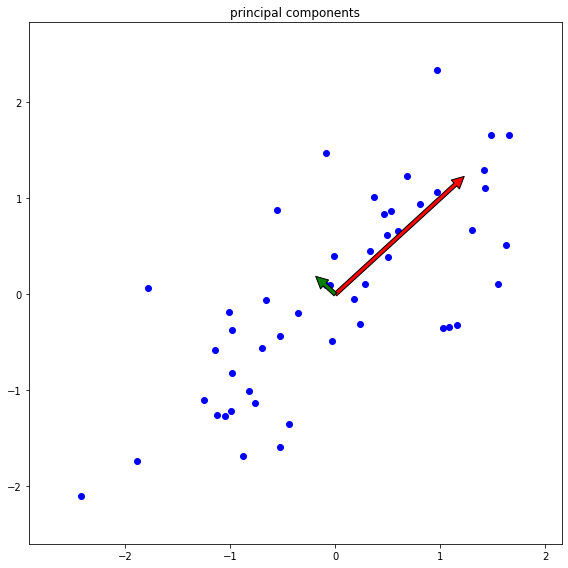

**************************************************
## [RESULT 03]
**************************************************


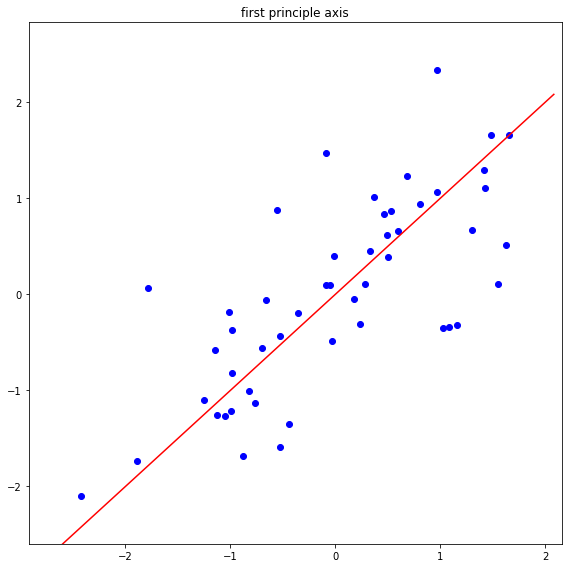

**************************************************
## [RESULT 04]
**************************************************


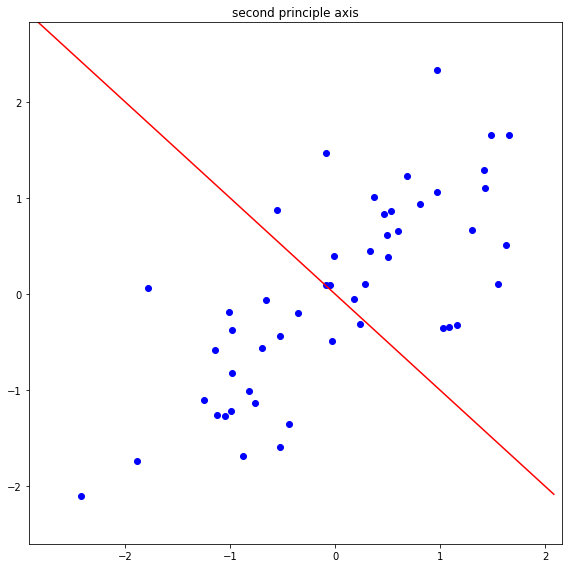

**************************************************
## [RESULT 05]
**************************************************


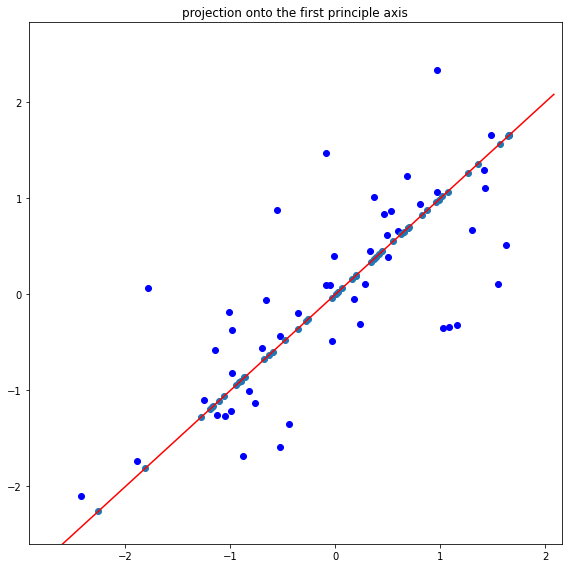

**************************************************
## [RESULT 06]
**************************************************


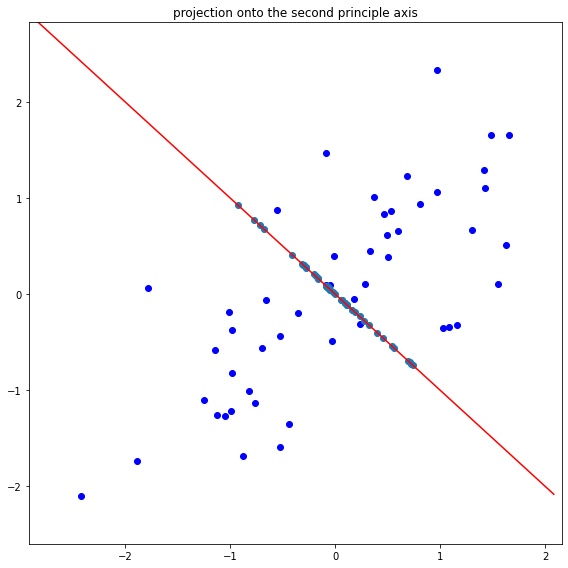

**************************************************
## [RESULT 07]
**************************************************


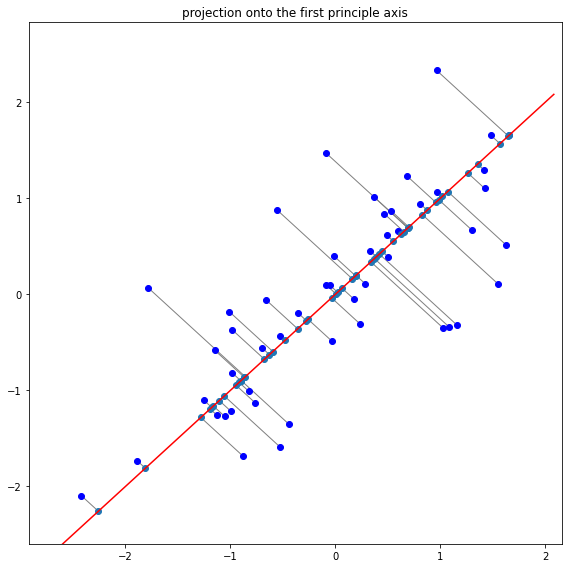

**************************************************
## [RESULT 08]
**************************************************


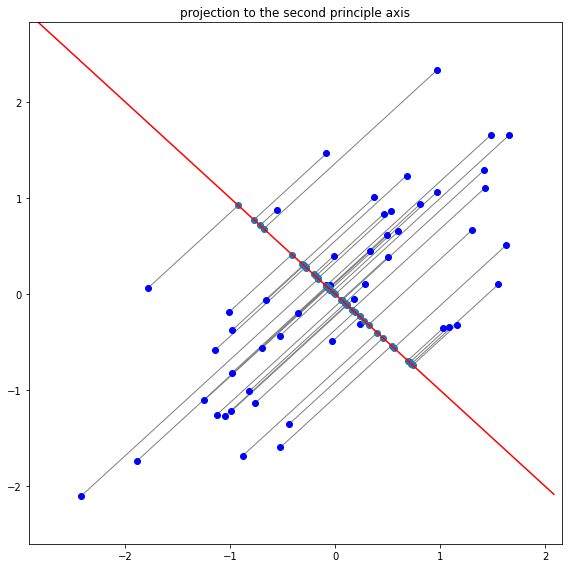

In [80]:
number_result = 8

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)